### Step 1: Importing Required Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np,seaborn as sns
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 400)

### Step 2: Inspecting Dataframe

In [3]:
# Importing all datasets
Lead_Score = pd.read_csv("D:\AnilHadoop\\upgrad\Machine Learning\Logistic Regression\Assignment\Lead Scoring Assignment\Leads.csv")
Lead_Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe
Lead_Score.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
Lead_Score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
Lead_Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#checking the percentage of missing values
Missing_Percent= round(Lead_Score.isnull().sum().sort_values()*100/Lead_Score.shape[0],2)
Missing_Percent

Prospect ID                                       0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Magazine                                          0.00
Search                                            0.00
Newspaper Article                                 0.00
Last Notable Activity                             0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Cal

#### Inference:
From the above information We can observe that there are many columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9240 datapoints in our dataframe, let's eliminate the columns having greater than 30 percent missing values as they are of no use to us.

In [8]:
for x in Lead_Score.columns:
    if Missing_Percent[x] > 30:
        print(x , "has more than 30 percent missing values:" , Missing_Percent[x])
        Lead_Score.drop(x , 1 , inplace=True)
        print("Dropped" , x)

Tags has more than 30 percent missing values: 36.29
Dropped Tags
Lead Quality has more than 30 percent missing values: 51.59
Dropped Lead Quality
Asymmetrique Activity Index has more than 30 percent missing values: 45.65
Dropped Asymmetrique Activity Index
Asymmetrique Profile Index has more than 30 percent missing values: 45.65
Dropped Asymmetrique Profile Index
Asymmetrique Activity Score has more than 30 percent missing values: 45.65
Dropped Asymmetrique Activity Score
Asymmetrique Profile Score has more than 30 percent missing values: 45.65
Dropped Asymmetrique Profile Score


In [9]:
#checking the status of missing values after dropping columns
Missing_Percent= round(Lead_Score.isnull().sum().sort_values()*100/Lead_Score.shape[0],2)
Missing_Percent

Prospect ID                                       0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Magazine                                          0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
Do Not Call                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Email                                      0.00
Lead Origi

In [149]:
# Removing the columns ["Lead Number","Prospect ID"] which are not needed for analysis.
Lead_Score_1 = Lead_Score.drop(["Lead Number" , "Prospect ID"] , axis= 1)#, inplace = True)
Lead_Score_1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [11]:
# Converting 'Select' values to NaN.
Lead_Score_1 = Lead_Score_1.replace('Select', np.nan)

In [12]:
#checking the status of missing values after replacing 'Select' with null
Missing_Percent= round(Lead_Score.isnull().sum().sort_values()*100/Lead_Score.shape[0],2)
Missing_Percent

Prospect ID                                       0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Magazine                                          0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
Do Not Call                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Email                                      0.00
Lead Origi

We can drop "Lead Profile" and "How did you hear about X Education" as the they have more than 70% missing values

In [13]:
Lead_Score_1.drop(["Lead Profile" , "How did you hear about X Education"] , axis= 1 , inplace = True)
Lead_Score_1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [14]:
list(Lead_Score_1.columns)

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [15]:
cont_cols=[ 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
cat_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity',  
          'What is your current occupation', 'What matters most to you in choosing a course', 
          'Search','Magazine', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement',
          'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
          'Get updates on DM Content','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','Last Notable Activity','Specialization','City']

In [16]:
len(cont_cols),len(cat_cols)

(3, 24)

In [17]:
# Replacing the null values in categorical columns by mode of that respective the colmun
for i in cat_cols:
    if Lead_Score_1[i].isnull().sum()>0:
        value=Lead_Score_1[i].mode()[0]
        Lead_Score_1[i]=Lead_Score_1[i].fillna(value)

In [18]:
# Replacing the null values in continuous columns by median of that respective the colmun
for i in cont_cols:
    if Lead_Score_1[i].isnull().sum()>0:   
        value=Lead_Score_1[i].median()
        Lead_Score_1[i]=Lead_Score_1[i].fillna(value)

In [19]:
#now check all the null values are replaced or not
Lead_Score_1.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [20]:
# List of variables to map

varlist =  ["Do Not Email","A free copy of Mastering The Interview"]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Lead_Score_1[varlist] = Lead_Score_1[varlist].apply(binary_map)

In [21]:
Lead_Score_1[varlist]

,Do Not Email,A free copy of Mastering The Interview
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
9235,1,0
9236,0,1
9237,1,1
9238,0,0


##### Dummy Variables Preparation

In [22]:
# Creating dummy variables for the remaining categorical variables
for x in varlist:
    cat_cols.remove(x)
len(cat_cols) 
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Call',
 'Converted',
 'Last Activity',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Country',
 'I agree to pay the amount through cheque',
 'Last Notable Activity',
 'Specialization',
 'City']

In [23]:
#Lead_Score["Do Not Email"].value_counts()
len(cat_cols)

22

In [24]:
for i in cat_cols:
    print(Lead_Score_1[i].value_counts())

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited 

In [25]:
#Removing Converted from cat_cols
cat_cols.remove('Converted')
len(cat_cols)


21

In [26]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Lead_Score_1[cat_cols],drop_first=True)
dummy1

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [27]:
Lead_Score_1 = pd.concat([Lead_Score_1,dummy1], axis=1)

In [28]:
# We have created dummies for the below variables, so we can drop them
Lead_Score_1 = Lead_Score_1.drop(cat_cols, 1)

In [29]:
Lead_Score_1.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

#### Outlier Analysis

In [30]:
# Checking for outliers in the continuous variables
num_Lead_Score = Lead_Score_1[cont_cols]

In [31]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_Lead_Score.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [32]:
Total_Visits = Lead_Score_1['TotalVisits'].quantile(0.99)
PageViewsPerVisit =  Lead_Score_1['Page Views Per Visit'].quantile(0.99)
print(Total_Visits)
print(PageViewsPerVisit)

17.0
9.0


In [33]:
Lead_Score_1 = Lead_Score_1[(Lead_Score_1["TotalVisits"] <= Total_Visits) & (Lead_Score_1['Page Views Per Visit'] <= PageViewsPerVisit)]

In [34]:
Lead_Score_1[cont_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9090.000000,9090.000000,9090.000000
mean,3.140924,484.243784,2.262836
std,2.881884,547.243973,1.881164
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,4.000000,930.000000,3.000000
max,17.000000,2272.000000,9.000000


In [35]:
Lead_Score_1

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

### Step 4: Test-Train Split

In [36]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = Lead_Score_1.drop('Converted', axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [37]:
# Putting response variable to y
y = Lead_Score_1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [38]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [39]:
X_test.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic',
       ...
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object', length=133)

### Step 5: Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])

X_train[cont_cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
302,1.336782,-0.428736,0.044021
6087,-1.094877,-0.887355,-1.206716
1033,0.642022,-0.025151,1.477269
7656,0.989402,-0.241619,2.014065
3241,0.294642,0.897591,-0.492776


In [42]:
### Checking the Converted Rate
Converted_Rate = (sum(Lead_Score_1['Converted'])/len(Lead_Score_1['Converted'].index))*100
Converted_Rate

38.448844884488445

In [43]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

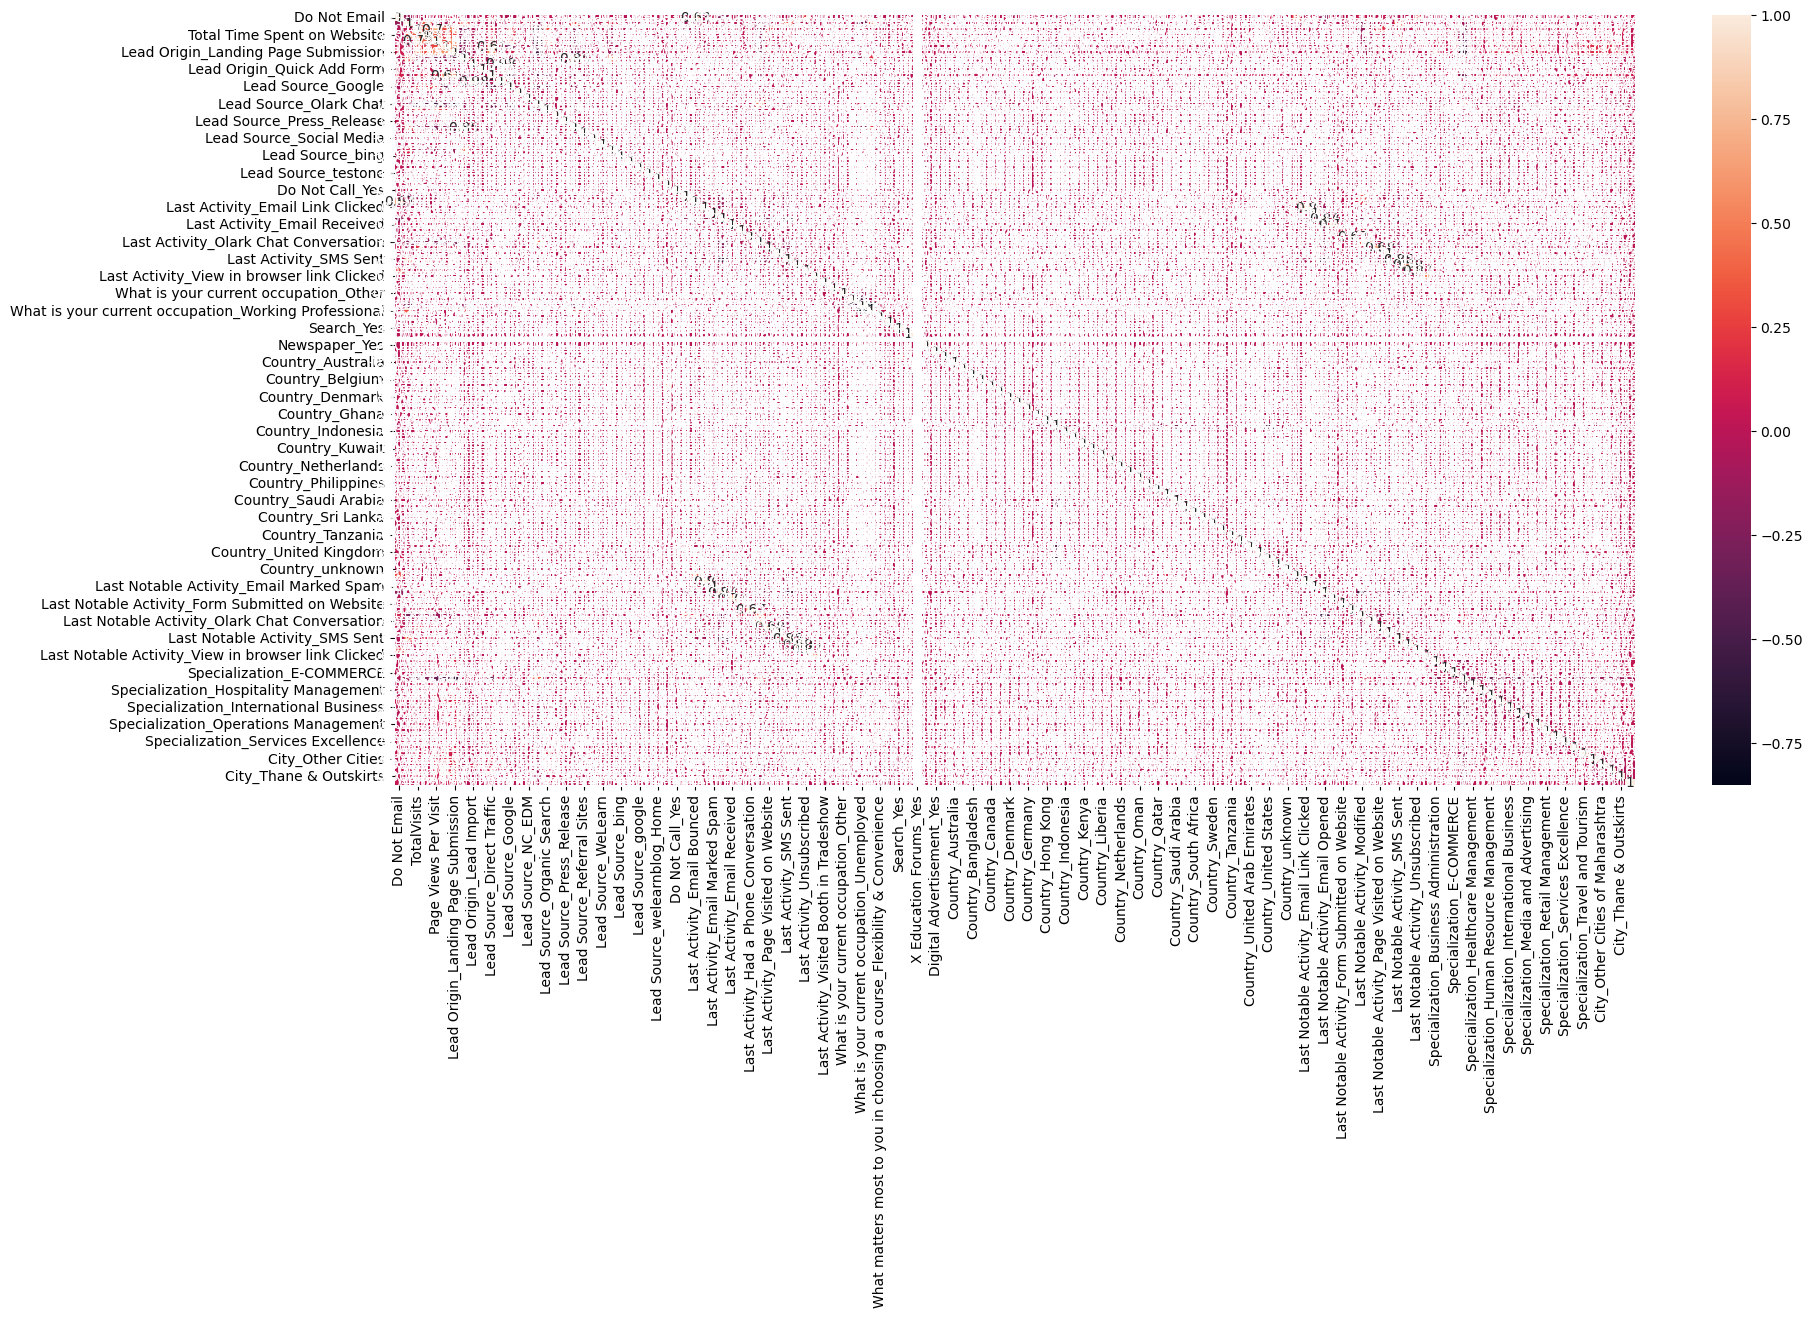

In [44]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Lead_Score_1.corr(),annot = True)
plt.show()

### Step 6: Model Building


In [46]:
import statsmodels.api as sm

In [47]:
# Building Logistic regression model1 
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6241
Model Family:                Binomial   Df Model:                          121
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2518.4
Date:                Sat, 17 Feb 2024   Deviance:                       5036.8
Time:                        13:43:46   Pearson chi2:                 6.74e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.4161
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      48.7533   3.97e+05      0.000      1.000   -7.78e+05    7.78e+05
Do Not Email                                                               -1.3539      0.213     -6.353      0.000      -1.772      -0.936
TotalVisits                                                                 0.2596      0.052      4.987      0.000       0.158       0.362
Total Time Spent on Website                                                 1.0795      0.041     26.118      0.000       0.998       1.160
Page Views Per Visit                                                       -0.2181      0.059     -3.727      0.000      -0.333      -0.103
A free copy of Mastering The Interview                                     -0.1151      0.114     -1.011      0.312      -0.338       0.108
Lead Origin_Landing Page Submission                                        -0.4153      0.123     -3.383      0.001      -0.656      -0.175
Lead Origin_Lead Add Form                                                   3.5807      0.695      5.152      0.000       2.218       4.943
Lead Origin_Lead Import                                                    22.6169   1.07e+05      0.000      1.000    -2.1e+05     2.1e+05
Lead Origin_Quick Add Form                                                 29.1168   1.75e+06   1.66e-05      1.000   -3.43e+06    3.43e+06
Lead Source_Direct Traffic                                                -20.7808   7.58e+04     -0.000      1.000   -1.48e+05    1.48e+05
Lead Source_Facebook                                                      -43.3980   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                                        -20.4533   7.58e+04     -0.000      1.000   -1.48e+05    1.48e+05
Lead Source_Live Chat                                                       1.5370   1.38e+05   1.12e-05      1.000    -2.7e+05     2.7e+05
Lead Source_NC_EDM                                                          4.9180   2.25e+05   2.18e-05      1.000   -4.42e+05    4.42e+05
Lead Source_Olark Chat                                                    -19.5705   7.58e+04     -0.000      1.000   -1.48e+05    1.48e+05
Lead Source_Organic Search                                                -20.7588   7.58e+04     -0.000      1.000   -1.48e+05    1.48e+05
Lead Source_Pay per Click Ads                                           -2.181e-08      0.001   -1.8e-05      1.000      -0.002       0.002
Lead Source_Press_Release                                                 -45.4967    1.1e+06  -4.13e-05      1.000   -2.16e+06    2.16e+06
Lea

### Step 7: Feature Selection Using RFE

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [49]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [50]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [51]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 66),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 67),
 ('A free copy of Mastering The Interview', False, 85),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 76),
 ('Lead Origin_Quick Add Form', False, 54),
 ('Lead Source_Direct Traffic', False, 43),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 60),
 ('Lead Source_Live Chat', False, 83),
 ('Lead Source_NC_EDM', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Pay per Click Ads', False, 114),
 ('Lead Source_Press_Release', False, 103),
 ('Lead Source_Reference', False, 77),
 ('Lead Source_Referral Sites', False, 59),
 ('Lead Source_Social Media', False, 15),
 ('Lead Source_WeLearn', False, 49),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 91),
 ('Lead Source_blog'

In [52]:
col = X_train.columns[rfe.support_]

In [53]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       ...
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object', length=118)

##### Assessing the model with StatsModels

In [54]:
#Building Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.3
Date:                Sat, 17 Feb 2024   Deviance:                       5252.6
Time:                        13:43:56   Pearson chi2:                 6.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3960
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3989      0.052    -26.826      0.000      -1.501      -1.297
Do Not Email                                            -1.6974      0.177     -9.616      0.000      -2.043      -1.351
Total Time Spent on Website                              1.0970      0.040     27.404      0.000       1.019       1.175
Lead Origin_Lead Add Form                                3.6578      0.197     18.559      0.000       3.272       4.044
Lead Source_Olark Chat                                   1.1123      0.104     10.731      0.000       0.909       1.315
Lead Source_Welingak Website                             2.9847      1.030      2.898      0.004       0.966       5.003
Last Activity_Converted to Lead                         -1.1282      0.208     -5.416      0.000      -1.536      -0.720
Last Activity_Olark Chat Conversation                   -1.3922      0.159     -8.735      0.000      -1.705      -1.080
What is your current occupation_Housewife               24.0560   2.33e+04      0.001      0.999   -4.57e+04    4.58e+04
What is your current occupation_Working Professional     2.7797      0.187     14.854      0.000       2.413       3.146
Country_Italy                                          -25.0981   4.55e+04     -0.001      1.000   -8.92e+04    8.92e+04
Country_Qatar                                          -23.6614   2.95e+04     -0.001      0.999   -5.78e+04    5.78e+04
Last Notable Activity_Had a Phone Conversation          24.4634   2.37e+04      0.001      0.999   -4.64e+04    4.64e+04
Last Notable Activity_SMS Sent                           1.6217      0.080     20.154      0.000       1.464       1.779
Last Notable Activity_Unreachable                        2.0600      0.605      3.404      0.001       0.874       3.246
Last Notable Activity_Unsubscribed                       1.7245      0.489      3.525      0.000       0.766       2.683
========================================================================================================================
"""

In [55]:
# dropping column with high p-value
col = col.drop('Country_Italy',1)

In [56]:
# Building Model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.4
Date:                Sat, 17 Feb 2024   Deviance:                       5258.8
Time:                        13:43:57   Pearson chi2:                 6.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3954
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3983      0.052    -26.830      0.000      -1.500      -1.296
Do Not Email                                            -1.6941      0.176     -9.603      0.000      -2.040      -1.348
Total Time Spent on Website                              1.0947      0.040     27.382      0.000       1.016       1.173
Lead Origin_Lead Add Form                                3.6563      0.197     18.557      0.000       3.270       4.042
Lead Source_Olark Chat                                   1.1114      0.104     10.730      0.000       0.908       1.314
Lead Source_Welingak Website                             2.9839      1.030      2.897      0.004       0.965       5.002
Last Activity_Converted to Lead                         -1.1273      0.208     -5.413      0.000      -1.535      -0.719
Last Activity_Olark Chat Conversation                   -1.3928      0.159     -8.741      0.000      -1.705      -1.080
What is your current occupation_Housewife               24.0552   2.33e+04      0.001      0.999   -4.57e+04    4.58e+04
What is your current occupation_Working Professional     2.7801      0.187     14.862      0.000       2.413       3.147
Country_Qatar                                          -23.6562   2.95e+04     -0.001      0.999   -5.78e+04    5.78e+04
Last Notable Activity_Had a Phone Conversation          24.4623   2.37e+04      0.001      0.999   -4.64e+04    4.64e+04
Last Notable Activity_SMS Sent                           1.6154      0.080     20.102      0.000       1.458       1.773
Last Notable Activity_Unreachable                        2.0592      0.605      3.404      0.001       0.873       3.245
Last Notable Activity_Unsubscribed                       1.7214      0.489      3.520      0.000       0.763       2.680
========================================================================================================================
"""

In [57]:
# dropping column with high p-value
col = col.drop('What is your current occupation_Housewife',1)

In [58]:
# Building Model 4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.9
Date:                Sat, 17 Feb 2024   Deviance:                       5273.8
Time:                        13:43:57   Pearson chi2:                 6.87e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3940
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3892      0.052    -26.741      0.000      -1.491      -1.287
Do Not Email                                            -1.6995      0.176     -9.634      0.000      -2.045      -1.354
Total Time Spent on Website                              1.0943      0.040     27.408      0.000       1.016       1.173
Lead Origin_Lead Add Form                                3.6706      0.197     18.662      0.000       3.285       4.056
Lead Source_Olark Chat                                   1.1052      0.103     10.682      0.000       0.902       1.308
Lead Source_Welingak Website                             2.9629      1.030      2.877      0.004       0.944       4.981
Last Activity_Converted to Lead                         -1.1354      0.208     -5.454      0.000      -1.543      -0.727
Last Activity_Olark Chat Conversation                   -1.3976      0.159     -8.774      0.000      -1.710      -1.085
What is your current occupation_Working Professional     2.7740      0.187     14.829      0.000       2.407       3.141
Country_Qatar                                          -23.6611   2.95e+04     -0.001      0.999   -5.78e+04    5.78e+04
Last Notable Activity_Had a Phone Conversation          24.4529   2.37e+04      0.001      0.999   -4.64e+04    4.64e+04
Last Notable Activity_SMS Sent                           1.6076      0.080     20.021      0.000       1.450       1.765
Last Notable Activity_Unreachable                        2.0509      0.605      3.390      0.001       0.865       3.237
Last Notable Activity_Unsubscribed                       1.7177      0.489      3.512      0.000       0.759       2.676
========================================================================================================================
"""

In [59]:
# dropping column with high p-value
col = col.drop('Country_Qatar',1)

In [60]:
# Building Model 5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.5
Date:                Sat, 17 Feb 2024   Deviance:                       5280.9
Time:                        13:43:57   Pearson chi2:                 6.87e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3933
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3906      0.052    -26.774      0.000      -1.492      -1.289
Do Not Email                                            -1.6981      0.176     -9.635      0.000      -2.044      -1.353
Total Time Spent on Website                              1.0919      0.040     27.397      0.000       1.014       1.170
Lead Origin_Lead Add Form                                3.6707      0.197     18.666      0.000       3.285       4.056
Lead Source_Olark Chat                                   1.1055      0.103     10.691      0.000       0.903       1.308
Lead Source_Welingak Website                             2.9625      1.030      2.877      0.004       0.944       4.981
Last Activity_Converted to Lead                         -1.1326      0.208     -5.443      0.000      -1.541      -0.725
Last Activity_Olark Chat Conversation                   -1.3970      0.159     -8.772      0.000      -1.709      -1.085
What is your current occupation_Working Professional     2.7756      0.187     14.842      0.000       2.409       3.142
Last Notable Activity_Had a Phone Conversation          23.4536   1.44e+04      0.002      0.999   -2.81e+04    2.82e+04
Last Notable Activity_SMS Sent                           1.6040      0.080     20.003      0.000       1.447       1.761
Last Notable Activity_Unreachable                        2.0520      0.605      3.393      0.001       0.866       3.237
Last Notable Activity_Unsubscribed                       1.7182      0.489      3.514      0.000       0.760       2.677
========================================================================================================================
"""

In [61]:
# dropping column with high p-value
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

In [147]:
# Building Model 6
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.5
Date:                Sat, 17 Feb 2024   Deviance:                       5299.0
Time:                        17:22:23   Pearson chi2:                 6.87e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3916
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3795      0.052    -26.668      0.000      -1.481      -1.278
Do Not Email                                            -1.7027      0.176     -9.670      0.000      -2.048      -1.358
Total Time Spent on Website                              1.0904      0.040     27.430      0.000       1.013       1.168
Lead Origin_Lead Add Form                                3.6609      0.197     18.627      0.000       3.276       4.046
Lead Source_Olark Chat                                   1.0972      0.103     10.635      0.000       0.895       1.299
Lead Source_Welingak Website                             2.9627      1.030      2.877      0.004       0.944       4.981
Last Activity_Converted to Lead                         -1.1421      0.208     -5.492      0.000      -1.550      -0.734
Last Activity_Olark Chat Conversation                   -1.4028      0.159     -8.812      0.000      -1.715      -1.091
What is your current occupation_Working Professional     2.7690      0.187     14.810      0.000       2.403       3.135
Last Notable Activity_SMS Sent                           1.5950      0.080     19.916      0.000       1.438       1.752
Last Notable Activity_Unreachable                        2.0420      0.605      3.377      0.001       0.857       3.227
Last Notable Activity_Unsubscribed                       1.7138      0.489      3.507      0.000       0.756       2.671
========================================================================================================================
"""

In [151]:
# Ordering features by importance by squaring the coefficients
(res.params**2).sort_values(ascending=False)

Lead Origin_Lead Add Form                               13.402240
Lead Source_Welingak Website                             8.777320
What is your current occupation_Working Professional     7.667511
Last Notable Activity_Unreachable                        4.169751
Last Notable Activity_Unsubscribed                       2.937001
Do Not Email                                             2.899119
Last Notable Activity_SMS Sent                           2.543875
Last Activity_Olark Chat Conversation                    1.967830
const                                                    1.902932
Last Activity_Converted to Lead                          1.304435
Lead Source_Olark Chat                                   1.203936
Total Time Spent on Website                              1.189076
dtype: float64

In [63]:
#Checking VIFs for multicollinearity assessment
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.55
2,Lead Origin_Lead Add Form,1.46
6,Last Activity_Olark Chat Conversation,1.35
4,Lead Source_Welingak Website,1.29
1,Total Time Spent on Website,1.22
8,Last Notable Activity_SMS Sent,1.17
7,What is your current occupation_Working Profes...,1.16
0,Do Not Email,1.09
10,Last Notable Activity_Unsubscribed,1.07
5,Last Activity_Converted to Lead,1.00


##### All the variables are independent and no significant multicollinearity is detected

In [64]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.136228
6087    0.049617
1033    0.196724
7656    0.147963
3241    0.767502
5738    0.092703
7366    0.065827
3680    0.111548
4170    0.751428
43      0.129770
dtype: float64

In [65]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
302,0,0.136228
6087,0,0.049617
1033,0,0.196724
7656,0,0.147963
3241,1,0.767502


### Step 8: Plotting the ROC Curve

In [66]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [67]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

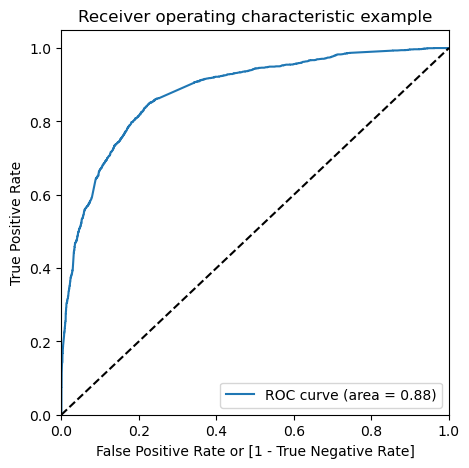

In [68]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 9: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificitya

In [69]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
302,0,0.136228,1,1,0,0,0,0,0,0,0,0
6087,0,0.049617,1,0,0,0,0,0,0,0,0,0
1033,0,0.196724,1,1,0,0,0,0,0,0,0,0
7656,0,0.147963,1,1,0,0,0,0,0,0,0,0
3241,1,0.767502,1,1,1,1,1,1,1,1,0,0


In [70]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.585259  0.967051  0.349682
0.2   0.2  0.743360  0.912273  0.639136
0.3   0.3  0.804023  0.840198  0.781703
0.4   0.4  0.810781  0.769769  0.836086
0.5   0.5  0.812038  0.698105  0.882338
0.6   0.6  0.795065  0.583196  0.925794
0.7   0.7  0.784064  0.514003  0.950699
0.8   0.8  0.749804  0.389621  0.972046
0.9   0.9  0.718058  0.279654  0.988564


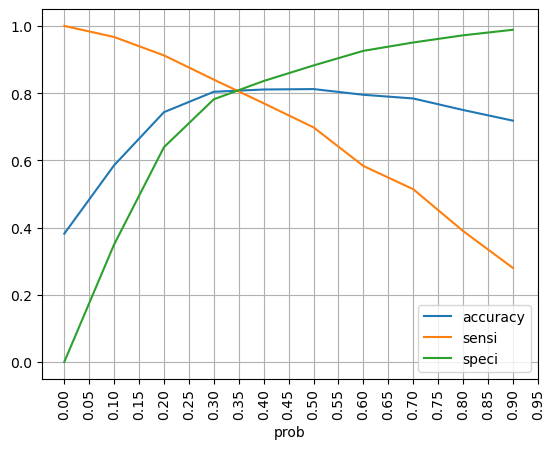

In [71]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(ticks =np.arange(0,1,step=0.05),rotation = 'vertical' )
plt.grid(axis = 'both')
plt.show()


#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [72]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
302,0,0.136228,1,1,0,0,0,0,0,0,0,0,0
6087,0,0.049617,1,0,0,0,0,0,0,0,0,0,0
1033,0,0.196724,1,1,0,0,0,0,0,0,0,0,0
7656,0,0.147963,1,1,0,0,0,0,0,0,0,0,0
3241,1,0.767502,1,1,1,1,1,1,1,1,0,0,1


### Step 10: Model Assessment

In [73]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8068521137828069

In [74]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion1

array([[3165,  770],
       [ 459, 1969]], dtype=int64)

In [75]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [76]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8109555189456342

In [77]:
# Let us calculate specificity
TN / float(TN+FP)

0.8043202033036849

In [78]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19567979669631513


In [79]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8733443708609272


#### Precision and Recall

In [80]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3165,  770],
       [ 459, 1969]], dtype=int64)

##### Precision
TP / TP + FP

In [81]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7188755020080321

##### Recall
TP / TP + FN

In [82]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8109555189456342

##### Using sklearn utilities for the same

In [83]:
from sklearn.metrics import precision_score, recall_score

In [84]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7188755020080321

In [85]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8109555189456342

##### Precision and recall tradeoff

In [86]:
from sklearn.metrics import precision_recall_curve

In [87]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

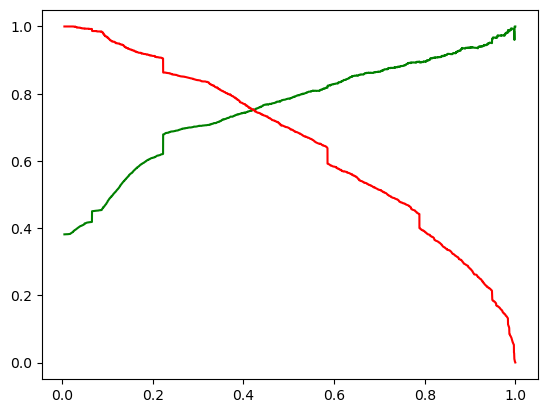

In [88]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set


In [89]:
#Scaling continous columns
X_test[cont_cols] = scaler.transform(X_test[cont_cols])


In [90]:
#Assigning columns that are selected as relevant features
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
6906,0,1.919395,0,0,0,0,0,0,1,0,0
1873,0,-0.546142,0,0,0,0,0,0,0,0,0
771,0,-0.797465,0,0,0,0,0,0,0,0,0
4495,0,-0.623190,0,0,0,0,0,0,0,0,0
9061,0,2.392690,0,0,0,0,0,0,0,0,0


In [91]:
X_test_sm = sm.add_constant(X_test)

##### Making predictions on the test set

In [92]:
y_test_pred = res.predict(X_test_sm)

In [93]:
y_test_pred[:10]

6906    0.909577
1873    0.121852
771     0.095430
4495    0.113144
9061    0.773755
4929    0.471871
2308    0.165628
1034    0.089555
9033    0.094742
7008    0.920891
dtype: float64

In [94]:
# Converting y_test_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame(y_test_pred,columns = ['Converted_Prob'])

In [95]:
y_test_pred_df.head()

,Converted_Prob
6906,0.909577
1873,0.121852
771,0.095430
4495,0.113144
9061,0.773755


In [96]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [97]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

In [98]:
y_test_pred_final.head()

,Converted,Converted_Prob
6906,1,0.909577
1873,0,0.121852
771,0,0.095430
4495,0,0.113144
9061,1,0.773755


In [100]:
y_test_pred_final

,Converted,Converted_Prob
6906,1,0.909577
1873,0,0.121852
771,0,0.095430
4495,0,0.113144
9061,1,0.773755
...,...,...
1939,0,0.216383
1540,1,0.381141
5198,1,0.182887
8660,0,0.065827


In [101]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [102]:
y_test_pred_final.head()

,Converted,Converted_Prob,final_predicted
6906,1,0.909577,1
1873,0,0.121852,0
771,0,0.095430,0
4495,0,0.113144,0
9061,1,0.773755,1


##### Model evaluation on Test set

In [150]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8027136046938027

In [104]:
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion

array([[1323,  337],
       [ 201,  866]], dtype=int64)

In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
TP / float(TP+FN)

0.8116213683223993

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.7969879518072289

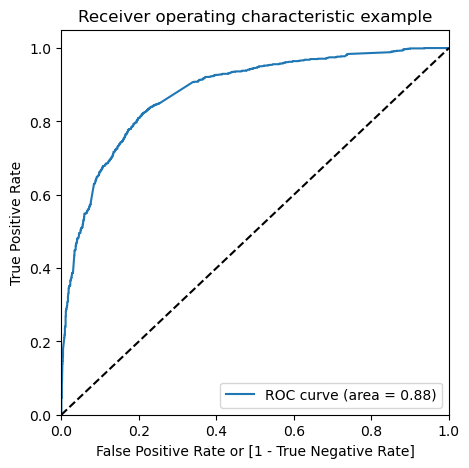

In [108]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Prob)

### Step 12: Assigning the LEAD SCORE for HOT LEADS DataSet

In [109]:
y_final = pd.concat([y_train_pred_final[['Converted','Converted_Prob','final_predicted']], y_test_pred_final[['Converted','Converted_Prob','final_predicted']]],axis =0)

In [133]:
Hot_Leads = y_final[['Converted','Converted_Prob','final_predicted']].join(Lead_Score[['Lead Number','Prospect ID','Converted']],rsuffix='_pred')

In [134]:
Hot_Leads.head()

,Converted,Converted_Prob,final_predicted,Lead Number,Prospect ID,Converted_pred
302,0,0.136228,0,657224,bf79ca0b-cecb-482a-a2c2-cfd6c4334d91,0
6087,0,0.049617,0,603146,1520480f-4226-4fe3-9136-8aa2bc9cdf05,0
1033,0,0.196724,0,649181,a973c595-96d2-4963-a20e-e025da18a4cf,0
7656,0,0.147963,0,591076,a490af03-2b27-4fc8-8fbf-c4e4af0ecb87,0
3241,1,0.767502,1,628982,968ccb59-5554-49f0-86a4-dcee5f9eae76,1


In [125]:
Hot_Leads['Lead_Score']= Hot_Leads['Converted_Prob'].apply(lambda x : round(x*100))

In [130]:
# Determining hot leads with more than 80% Conversion Rate
Hot_Leads = Hot_Leads[Hot_Leads["Lead_Score"]>80]
Hot_Leads.shape

(1488, 6)

In [131]:
#Hot Leads Data set which has Lead numbers that have more than 80% conversion rate
Hot_Leads

,Converted,Converted_Prob,final_predicted,Lead Number,Prospect ID,Lead_Score
242,1,0.868326,1,657905,eff492d9-4b36-445a-9f55-b68fe533d3e5,87
8801,1,0.935509,1,582709,e4bc0f65-cafb-4c5d-8dfb-dc28501ed1ff,94
994,1,0.998772,1,649493,1627d1fe-f39b-4a29-ba9e-ab40ab643d05,100
8042,0,0.881631,1,588158,a5b89fc5-2efe-404b-bc6a-ac7846ebf257,88
3679,1,0.822639,1,624871,53592a51-8812-4602-af4f-1d26ed5425a3,82
...,...,...,...,...,...,...
6947,1,0.927475,1,596376,a1e98610-0a3e-4022-835c-5fb70ca08aaa,93
3270,1,0.848691,1,628658,2087d763-37ab-48c4-942c-0b672231c20d,85
8343,0,0.958053,1,586175,6f93b685-df54-47c8-b0c6-11f11e6d902e,96
5807,1,0.996591,1,605262,7f9fa790-b58b-4192-9f63-8ada4274470c,100
